## ANÁLISIS EXPLORATORIO DE DATOS (EDA)

### INFORMACIÓN ÍNDICE S&P 500

### FUENTE DE DATOS: API YAHOO FINANCE

## PROBLEMA DE NEGOCIO
Una empresa busca invertir en el mercado bursátil y ha solicitado un análisis detallado de los últimos 23 años para considerar decisiones de inversión.

Solicita remitirse al índice S&P_500 como información de referencia para la investigación.

¿Qué decisiones de inversión se pueden sugerir a la empresa inversionista?

Nota: El análisis se centra en el rubro Energía del índice S&P 500.

## OBJETIVOS
* Conocer la situación del mercado bursátil en los últimos 23 años

* Contextualizar el problema

* Generar recomendaciones de inversión

#### Con esta visión general de la problemática se pasa a enfrentar el análisis

In [1]:
#SE IMPORTAN LAS LIBRERÍAS REQUERIDAS EN EL ANÁLISIS
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Pedro Hoyos\AppData\Local\Temp\ipykernel_11400\1704066978.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [2]:
#SE IMPORTAN LAS LIBRERÍAS REQUERIDAS EN EL ANÁLISIS
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
from ipywidgets import HTML, Button, widgets
from pandas_profiling.report.presentation.core import Alerts
from pandas_profiling.report.presentation.flavours.html import templates

Se realiza la descarga de la información requerida para el estudio

In [109]:
#INFORMACIÓN HISTÓRICA MICROSOFT
msft = yf.download('MSFT', start='2000-01-01', end='2022-12-31')
msft.drop(columns=['Open', 'High', 'Low', 'Close'], inplace=True)
msft.to_csv('msft.csv', sep=';')

[*********************100%***********************]  1 of 1 completed


In [110]:
#INFORMACIÓN HISTÓRICA JOHNSON
jnj = yf.download('JNJ', start='2000-01-01', end='2022-12-31')
jnj.drop(columns=['Open', 'High', 'Low', 'Close'], inplace=True)
jnj.to_csv('jnj.csv', sep=';')

[*********************100%***********************]  1 of 1 completed


In [111]:
#INFORMACIÓN HISTÓRICA EXXON
xom = yf.download('XOM', start='2000-01-01', end='2022-12-31')
xom.drop(columns=['Open', 'High', 'Low', 'Close'], inplace=True)
xom.to_csv('xom.csv', sep=';')

[*********************100%***********************]  1 of 1 completed


In [112]:
#INFORMACIÓN HISTÓRICA JPMorgan
jpm = yf.download('JPM', start='2000-01-01', end='2022-12-31')
jpm.drop(columns=['Open', 'High', 'Low', 'Close'], inplace=True)
jpm.to_csv('jpm.csv', sep=';')

[*********************100%***********************]  1 of 1 completed


In [113]:
#INFORMACIÓN HISTÓRICA APPLE
aapl = yf.download('AAPL', start='2000-01-01', end='2022-12-31')
aapl.drop(columns=['Open', 'High', 'Low', 'Close'], inplace=True)
aapl.to_csv('aapl.csv', sep=';')

[*********************100%***********************]  1 of 1 completed


In [114]:
#INFORMACIÓN HISTÓRICA GOOGLE
googl = yf.download('GOOGL', start='2000-01-01', end='2022-12-31')
googl.drop(columns=['Open', 'High', 'Low', 'Close'], inplace=True)
googl.to_csv('googl.csv', sep=';')

[*********************100%***********************]  1 of 1 completed


In [115]:
#INFORMACIÓN HISTÓRICA AMAZON
amzn = yf.download('AMZN', start='2000-01-01', end='2022-12-31')
amzn.drop(columns=['Open', 'High', 'Low', 'Close'], inplace=True)
amzn.to_csv('amzn.csv', sep=';')

[*********************100%***********************]  1 of 1 completed


In [116]:
#INFORMACIÓN HISTÓRICA FACEBOOK
meta = yf.download('META', start='2000-01-01', end='2022-12-31')
meta.drop(columns=['Open', 'High', 'Low', 'Close'], inplace=True)
meta.to_csv('meta.csv', sep=';')

[*********************100%***********************]  1 of 1 completed


In [117]:
#INFORMACIÓN HISTÓRICA TESLA
tsla = yf.download('TSLA', start='2000-01-01', end='2022-12-31')
tsla.drop(columns=['Open', 'High', 'Low', 'Close'], inplace=True)
tsla.to_csv('tsla.csv', sep=';')

[*********************100%***********************]  1 of 1 completed


In [118]:
#INFORMACIÓN HISTÓRICA PFIZER
pfe = yf.download('PFE', start='2000-01-01', end='2022-12-31')
pfe.drop(columns=['Open', 'High', 'Low', 'Close'], inplace=True)
pfe.to_csv('pfe.csv', sep=';')

[*********************100%***********************]  1 of 1 completed


In [119]:
#INFORMACIÓN HISTÓRICA S&P500
gspc = yf.download("^GSPC", start="2000-01-01", end="2022-12-31")
gspc.drop(columns=['Open', 'High', 'Low', 'Close'], inplace=True)
gspc.to_csv('gspc.csv', sep=';')

[*********************100%***********************]  1 of 1 completed


In [130]:
#ASIGNACIÓN DE SÍMBOLO DE LA COMPAÑÍA ANTE S&P 500
xom = pd.read_csv('xom.csv', sep=';')
xom = xom.assign(Comp='XOM')

In [143]:
#REUNIMOS LA IINFORMACIÓN DE PRECIO Y VOLUMEN EN UN NUEVO DATAFRAME
top_10 = pd.concat([aapl, amzn, googl, jnj, jpm, meta, msft, pfe, tsla, xom], ignore_index=True)

Se utilizará el precio de cierre ajustado.

El precio de cierre ajustado, también conocido como adjusted close price, es el precio de cierre que ha sido adaptado teniendo en cuenta los eventos corporativos y otros factores que pueden afectar el valor de la acción, como dividendos, splits y fusiones. El precio de cierre ajustado proporciona una medida más precisa y comparable del rendimiento de la acción a lo largo del tiempo.

El precio de cierre no los tiene en cuenta y, por lo tanto, si se utiliza éste en un análisis financiero, es posible que se subestime o se sobrestime el verdadero rendimiento de la acción.

In [148]:
#LECTURA DE INFORMACIÓN
gspc = pd.read_csv('gspc.csv', sep=';')

In [186]:
#REUNIMOS LOS DATOS CORREPONDIENTES AL TOP 10 CON LOS DEL ÍNDICE S&P 500
gspc = pd.merge(gspc, xom, on=['Date'], how='left')
gspc.drop(columns=['Comp'], inplace=True)

In [187]:
#REASIGNACIÓN DE NOMBRES
gspc.rename(columns={'Adj Close':'XOM_Clo'}, inplace=True)
gspc.rename(columns={'Volume':'XOM_Vol'}, inplace=True)

In [309]:
#SE REALIZA UNIÓN (merge) DE LA INFORMACIÓN DEL ÍNDICE S&P 500 CON LAS DÍEZ EMPRESAS TOP DENTRO DEL LISTADO EN LA ENTANA DE TIEMPO DEL ESTUDIO (años 2000 A 2023)
print(gspc.shape)
gspc.head()

(5787, 24)


Date     GSPC_Clo    GSPC_Vol  AAPL_Clo   AAPL_Vol  AMZN_Clo  \
0 2000-01-03  1455.219971   931800000  0.850643  535796800  4.468750   
1 2000-01-04  1399.420044  1009000000  0.778926  512377600  4.096875   
2 2000-01-05  1402.109985  1085500000  0.790324  778321600  3.487500   
3 2000-01-06  1403.449951  1092300000  0.721930  767972800  3.278125   
4 2000-01-07  1441.469971  1225200000  0.756128  460734400  3.478125   

    AMZN_Vol  GOOGL_Clo  GOOGL_Vol    JNJ_Clo  ...  META_Vol   MSFT_Clo  \
0  322352000        NaN        NaN  25.458212  ...       NaN  36.361584   
1  349748000        NaN        NaN  24.526192  ...       NaN  35.133263   
2  769148000        NaN        NaN  24.785089  ...       NaN  35.503700   
3  375040000        NaN        NaN  25.561787  ...       NaN  34.314419   
4  210108000        NaN        NaN  26.649149  ...       NaN  34.762836   

   MSFT_Vol    PFE_Clo   PFE_Vol  TSLA_Clo  TSLA_Vol    XOM_Clo   XOM_Vol  \
0  53228400  13.733071  12873345       NaN       NaN  18.984549  13458200   
1  54119000  13.221448  14208974       NaN       NaN  18.620918  14510800   
2  64059600  13.436871  12981591       NaN       NaN  19.636061  17485000   
3  54976600  13.921566  11115273       NaN       NaN  20.651184  19461600   
4  62013600  14.864032  17962163       NaN       NaN  20.590593  16603800   

     Month  
0  2000-01  
1  2000-01  
2  2000-01  
3  2000-01  
4  2000-01  

[5 rows x 24 columns]

Como es posible notar en la vista inicial, tenemos un dataset compuesto por 5787 filas y 24 columnas, las cuales contienen información diaria respecto a la fecha de operación búrsatil, el precio de cierre del índice S&P 500, el volumen transaccional, así como la misma información para las 10 compañías pertenecientes al sector de análisis presentado (Top 10 histórico), por último tenemos columnas de sumatoria para los precios de cierre y volumen (con excepción del S&P 500) y los porcentajes de precio de cierre y volumen (frente al S&P 500) para verificar relaciones entre dichas empresas y el índice general a través del tiempo.

### Qué información presentan los campos? (diario)
Date        --->    Fecha de operación búrsatil (categórica)

GSPC_Close   --->    Precio de cierre de la acción del S&P500 (numérica)

GSPC_Vol     --->    Volumen accionario del S&P500 negociado (numérica)

XXX_Close   --->    Precio de cierre de la acción de la compañía XXX (numérica)

XXX_Vol     --->    Volumen accionario de la compañía XXX negociado (numérica)

Sum_Clo     --->    Sumatoria de precio de cierre de las 23 compañías del rubro Energía (numérica)

Sum_Vol     --->    Sumatoria de volumen accionario de las 23 compañías del rubro Energía (numérica)

Por_Clo     --->    Participación en precio de cierre frente a S&P 500de las 23 compañías del rubro Energía (numérica)

Por_Vol     --->    Sumatoria de volumen accionario frente a S&P 500 de las 23 compañías del rubro Energía (numérica)

### XXX hace referencia al símbolo de la compañía en el mercado accionario
Ejemplo: AAPL = Apple Inc.

Cabe anotar que en el mercado búrsatil realizar un análisis técnico diario de acción del precio y a partir de éste llegar a conclusiones a nivel de análisis fundamental no va a reflejar resultados muy claros, precisamente porque un análisis de fondo requiere ventanas de tiempo superiores (por ejemplo 6 meses); sin embargo, la presente información se observará a nivel mensual y anual para lograr identificar tendencias que en un análisis diario presentarían alta volatilidad.

In [190]:
#SE EXPORTA A FORMATO csv LA INFORMACIÓN OBTENIDA ANTERIORMENTE
gspc.to_csv('gspc.csv', sep=';', index=False)

In [193]:
#SE CREA COLUMNA (Month) PARA AGRUPAR INFORMACIÓN
gspc['Date'] = pd.to_datetime(gspc['Date'])
gspc['Month'] = gspc['Date'].dt.strftime('%Y-%m')

In [195]:
# SE AGRUPA POR PROMEDIO (mean)
mon_ave_gspc = gspc.groupby('Month').mean().reset_index()

C:\Users\Pedro Hoyos\AppData\Local\Temp\ipykernel_7096\4276912541.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mon_ave_gspc = gspc.groupby('Month').mean().reset_index()


In [198]:
#VISTA GENERAL DE LA INFORMACIÓN MENSUAL
print(mon_ave_gspc.shape)
mon_ave_gspc.head()

(276, 23)


Month     GSPC_Clo      GSPC_Vol  AAPL_Clo      AAPL_Vol  AMZN_Clo  \
0  2000-01  1425.585504  1.074720e+09  0.785456  6.277589e+08  3.402500   
1  2000-02  1388.874500  1.045600e+09  0.848370  3.659891e+08  3.623125   
2  2000-03  1442.212599  1.137226e+09  0.976527  3.781894e+08  3.334918   
3  2000-04  1461.355257  1.058235e+09  0.935510  4.559160e+08  2.818750   
4  2000-05  1418.479548  9.044682e+08  0.766085  4.458068e+08  2.684695   

       AMZN_Vol  GOOGL_Clo  GOOGL_Vol    JNJ_Clo  ...  META_Clo  META_Vol  \
0  2.622090e+08        NaN        NaN  24.813565  ...       NaN       NaN   
1  2.074577e+08        NaN        NaN  21.773097  ...       NaN       NaN   
2  1.361605e+08        NaN        NaN  20.497939  ...       NaN       NaN   
3  1.705395e+08        NaN        NaN  21.815678  ...       NaN       NaN   
4  1.188078e+08        NaN        NaN  24.050901  ...       NaN       NaN   

    MSFT_Clo      MSFT_Vol    PFE_Clo       PFE_Vol  TSLA_Clo  TSLA_Vol  \
0  33.414626  6.374376e+07  14.930340  1.259360e+07       NaN       NaN   
1  30.976546  6.672438e+07  14.985392  1.024924e+07       NaN       NaN   
2  31.137270  8.818207e+07  14.870052  1.312990e+07       NaN       NaN   
3  24.647059  1.188498e+08  17.432254  1.480427e+07       NaN       NaN   
4  20.922749  6.111049e+07  19.066065  1.015463e+07       NaN       NaN   

     XOM_Clo       XOM_Vol  
0  20.123925  1.253011e+07  
1  18.826849  1.105231e+07  
2  18.852980  1.216284e+07  
3  19.346769  1.060105e+07  
4  19.914530  8.801445e+06  

[5 rows x 23 columns]

Se obtiene nuevo objeto dataframe, ahora compuesto por 276 filas y 23 columnas, de esta forma podremos identificar tendencias más claras. Sin embargo, llevaremos del mismo modo esta información a ventana de tiempo anual.

In [199]:
#SE EXPORTA A FORMATO csv LA INFORMACIÓN OBTENIDA ANTERIORMENTE
mon_ave_gspc.to_csv('mon_ave_gspc.csv', sep=';', index=False)

In [200]:
#SE DEFINE NUEVO OBJETO DATAFRAME QUE NOS PERMITIRÁ OBTENER EL VALOR DE MERCADO POR MES
mon_mar_val = mon_ave_gspc.loc[:, ['Month']]

El valor de mercado de una compañía está definido como el resultado del producto del último precio y el número de acciones en circulación (volumen).

In [223]:
#SE CREA COLUMNA CALCULADA (Precio de Cierre * Volumen de Negociación = Valor de Mercado)
mon_mar_val['XOM_Mar_Val'] = (mon_ave_gspc['XOM_Clo'] * mon_ave_gspc['XOM_Vol'])

In [226]:
#SE DEFINE FUNCIÓN PARA REALIZAR SUMATORIA DE LOS CAMPOS PRECIO DE CIERRE Y VOLUMEN DE NEGOCIACIÓN DE LAS COMPAÑÍAS TOP 10, EVITANDO VALORES NULOS
def suma_AB(row):
    return np.nansum([row['AAPL_Mar_Val'], row['AMZN_Mar_Val'], row['GOOGL_Mar_Val'], row['JNJ_Mar_Val'], row['JPM_Mar_Val'], row['META_Mar_Val'], row['MSFT_Mar_Val'], row['PFE_Mar_Val'], row['TSLA_Mar_Val'], row['XOM_Mar_Val']])

suma_AB_col = mon_mar_val.apply(suma_AB, axis=1)

mon_mar_val.insert(12, 'Mar_Val_Sum', suma_AB_col)

In [228]:
#SE OBTIENE EL PORCENTAJE DE PARTICIPACIÓN DE LAS COMPAÑIAS TOP 10 EN EL ÍNDICE S&P 500
mon_mar_val['Mar_Val_Por'] = (mon_mar_val['Mar_Val_Sum'] / mon_mar_val['GSPC_Mar_Val'])

In [229]:
#PRESENTACIÓN DE LA INFORMACIÓN CORRESPONDIENTE A VALOR DE MERCADO MENSUAL
print(mon_mar_val.shape)
mon_mar_val.head()

(276, 14)


Month  GSPC_Mar_Val  AAPL_Mar_Val  AMZN_Mar_Val  GOOGL_Mar_Val  \
0  2000-01  1.532105e+12  4.930769e+08  8.921661e+08            NaN   
1  2000-02  1.452207e+12  3.104940e+08  7.516452e+08            NaN   
2  2000-03  1.640122e+12  3.693122e+08  4.540842e+08            NaN   
3  2000-04  1.546457e+12  4.265142e+08  4.807081e+08            NaN   
4  2000-05  1.282970e+12  3.415261e+08  3.189627e+08            NaN   

    JNJ_Mar_Val   JPM_Mar_Val  META_Mar_Val  MSFT_Mar_Val   PFE_Mar_Val  \
0  1.904642e+08  2.042976e+08           NaN  2.129974e+09  1.880267e+08   
1  2.030581e+08  1.809637e+08           NaN  2.066891e+09  1.535889e+08   
2  2.493667e+08  2.112374e+08           NaN  2.745749e+09  1.952423e+08   
3  1.960970e+08  2.201312e+08           NaN  2.929299e+09  2.580718e+08   
4  1.314143e+08  1.755125e+08           NaN  1.278599e+09  1.936089e+08   

   TSLA_Mar_Val   XOM_Mar_Val   Mar_Val_Sum  Mar_Val_Por  
0           NaN  2.521550e+08  4.350160e+09     0.002839  
1           NaN  2.080802e+08  3.874721e+09     0.002668  
2           NaN  2.293058e+08  4.454298e+09     0.002716  
3           NaN  2.050961e+08  4.715917e+09     0.003049  
4           NaN  1.752766e+08  2.614901e+09     0.002038

Se obtiene nuevo objeto dataframe que ahora nos disponibiliza información respecto a valor de mercado, volumen de negociación y porcentaje de participación al índice S&P 500 de las empresas objeto de análisis (top 10).

In [230]:
#SE EXPORTA A FORMATO csv LA INFORMACIÓN OBTENIDA ANTERIORMENTE
mon_mar_val.to_csv('mon_mar_val.csv', sep=';', index=False)

In [231]:
#SE GENERA CAMPO (year) PARA AGRUPAR INFORMACIÓN ANUAL
mon_mar_val['Month'] = pd.to_datetime(mon_mar_val['Month'])
mon_mar_val['Year'] = mon_mar_val['Month'].dt.strftime('%Y')
yea_mar_val = mon_mar_val.groupby('Year').mean().reset_index()

C:\Users\Pedro Hoyos\AppData\Local\Temp\ipykernel_7096\3409844972.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yea_mar_val = mon_mar_val.groupby('Year').mean().reset_index()


In [234]:
#SE ELIMINAN ALGUNAS COLUMNAS QUE CONTIENEN INFORMACIÓN SECUNDARIA
yea_mar_val.drop(columns=['Mar_Val_Sum'], inplace=True)
yea_mar_val.drop(columns=['Mar_Val_Por'], inplace=True)

In [236]:
#SE DEFINE FUNCIÓN PARA REALIZAR SUMATORIA DE LOS CAMPOS PRECIO DE CIERRE Y VOLUMEN DE NEGOCIACIÓN DE LAS COMPAÑÍAS TOP 10, EVITANDO VALORES NULOS
def suma_AB(row):
    return np.nansum([row['AAPL_Mar_Val'], row['AMZN_Mar_Val'], row['GOOGL_Mar_Val'], row['JNJ_Mar_Val'], row['JPM_Mar_Val'], row['META_Mar_Val'], row['MSFT_Mar_Val'], row['PFE_Mar_Val'], row['TSLA_Mar_Val'], row['XOM_Mar_Val']])

suma_AB_col = yea_mar_val.apply(suma_AB, axis=1)

yea_mar_val.insert(12, 'Mar_Val_Sum', suma_AB_col)

In [238]:
#SE CALCULA PORCENTAJE DE PARTICIPACIÓN ANUAL DE LAS EMPRESAS TOP 10 EN EL ÍNDICE S&P 500
yea_mar_val['Mar_Val_Por'] = (yea_mar_val['Mar_Val_Sum'] / yea_mar_val['GSPC_Mar_Val'])

In [239]:
#PRESENTACIÓN DE LA INFORMACIÓN CORRESPONDIENTE A VALOR DE MERCADO ANUAL
print(yea_mar_val.shape)
yea_mar_val.head()

(23, 14)


Year  GSPC_Mar_Val  AAPL_Mar_Val  AMZN_Mar_Val  GOOGL_Mar_Val  \
0  2000  1.475382e+12  3.157535e+08  4.144753e+08            NaN   
1  2001  1.475448e+12  1.175713e+08  1.030839e+08            NaN   
2  2002  1.411785e+12  9.132345e+07  1.366551e+08            NaN   
3  2003  1.330836e+12  7.879168e+07  3.483539e+08            NaN   
4  2004  1.612228e+12  2.878162e+08  3.748197e+08   1.355683e+09   

    JNJ_Mar_Val   JPM_Mar_Val  META_Mar_Val  MSFT_Mar_Val   PFE_Mar_Val  \
0  1.750629e+08  1.958806e+08           NaN  1.871398e+09  2.227358e+08   
1  2.552601e+08  1.909815e+08           NaN  1.480841e+09  2.533674e+08   
2  2.669468e+08  1.801574e+08           NaN  1.284170e+09  2.608647e+08   
3  2.511842e+08  1.631307e+08           NaN  1.063135e+09  2.935665e+08   
4  2.226038e+08  2.305294e+08           NaN  1.158765e+09  3.528953e+08   

   TSLA_Mar_Val   XOM_Mar_Val   Mar_Val_Sum  Mar_Val_Por  
0           NaN  2.260188e+08  3.421325e+09     0.002319  
1           NaN  2.410041e+08  2.642109e+09     0.001791  
2           NaN  2.290047e+08  2.449122e+09     0.001735  
3           NaN  2.194774e+08  2.417639e+09     0.001817  
4           NaN  2.856097e+08  4.268722e+09     0.002648

Se obtiene nuevo objeto dataframe con el valor de mercado anual de las empresas pertenecientes al Top 10 histórico dentro del S&P 500

In [240]:
#SE EXPORTA A FORMATO csv LA INFORMACIÓN OBTENIDA ANTERIORMENTE
yea_mar_val.to_csv('yea_mar_val.csv', sep=';', index=False)

In [56]:
#INFORMACIÓN GENERAL DATAFRAME PRECIO DE CIERRE Y VOLUMEN DE NEGOCIACIÓN (MENSUAL)
mon_ave_gspc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        276 non-null    object 
 1   GSPC_Clo     276 non-null    float64
 2   GSPC_Vol     276 non-null    float64
 3   AAPL_Clo     276 non-null    float64
 4   AAPL_Vol     276 non-null    float64
 5   AMZN_Clo     276 non-null    float64
 6   AMZN_Vol     276 non-null    float64
 7   GOOGL_Clo    221 non-null    float64
 8   GOOGL_Vol    221 non-null    float64
 9   JNJ_Clo      276 non-null    float64
 10  JNJ_Vol      276 non-null    float64
 11  JPM_Clo      276 non-null    float64
 12  JPM_Vol      276 non-null    float64
 13  META_Clo     128 non-null    float64
 14  META_Vol     128 non-null    float64
 15  MSFT_Clo     276 non-null    float64
 16  MSFT_Vol     276 non-null    float64
 17  PFE_Clo      276 non-null    float64
 18  PFE_Vol      276 non-null    float64
 19  TSLA_Clo

In [57]:
#INFORMACIÓN GENERAL DATAFRAME VALOR DE MERCADO POR COMPAÑÍA E ÍNDICE S&P500 (MENSUAL)
mon_mar_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          276 non-null    object 
 1   GSPC_Mar_Val   276 non-null    float64
 2   AAPL_Mar_Val   276 non-null    float64
 3   AMZN_Mar_Val   276 non-null    float64
 4   GOOGL_Mar_Val  221 non-null    float64
 5   JNJ_Mar_Val    276 non-null    float64
 6   JPM_Mar_Val    276 non-null    float64
 7   META_Mar_Val   128 non-null    float64
 8   MSFT_Mar_Val   276 non-null    float64
 9   PFE_Mar_Val    276 non-null    float64
 10  TSLA_Mar_Val   151 non-null    float64
 11  XOM_Mar_Val    276 non-null    float64
 12  Mar_Val_Sum    276 non-null    float64
 13  Mar_Val_Por    276 non-null    float64
dtypes: float64(13), object(1)
memory usage: 30.3+ KB


In [58]:
#INFORMACIÓN GENERAL DATAFRAME VALOR DE MERCADO POR COMPAÑÍA E ÍNDICE S&P500 (ANUAL)
yea_mar_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           23 non-null     int64  
 1   GSPC_Mar_Val   23 non-null     float64
 2   AAPL_Mar_Val   23 non-null     float64
 3   AMZN_Mar_Val   23 non-null     float64
 4   GOOGL_Mar_Val  19 non-null     float64
 5   JNJ_Mar_Val    23 non-null     float64
 6   JPM_Mar_Val    23 non-null     float64
 7   META_Mar_Val   11 non-null     float64
 8   MSFT_Mar_Val   23 non-null     float64
 9   PFE_Mar_Val    23 non-null     float64
 10  TSLA_Mar_Val   13 non-null     float64
 11  XOM_Mar_Val    23 non-null     float64
 12  Mar_Val_Sum    23 non-null     float64
 13  Mar_Val_Por    23 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 2.6 KB


### Se utilizarán herramientas estadísticas y de visualización para:

* Entender de una mejor manera nuestra información disponible

* Tener un acercamiento inicial a la respuesta de la pregunta planteada en la descripción del problema

### Análisis individual de variables de acuerdo a información contenida en cada una de las fuentes de información:

In [241]:
#SE GENERA REPORTE INICIAL DE LA INFORMACIÓN CONTENIDA EN EL DATAFRAME VENTANA DE TIEMPO ANUAL
yea_rep = yea_mar_val.profile_report(sort=None, html={'style':{'full_width':True}})

In [242]:
#VISUALIZACIÓN REPORTE GENERAL
yea_rep

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Vista General de la Información

### el reporte nos permite observar lo siguiente:

*   Variables Categóricas: 1 (Fecha)

*   Variables Numéricas: 23 (Precio de cierre de acción y volúmenes de negociación)

*   Valores Nulos o faltantes: 26 (8.1% del total de datos). Datos pertenecientes a las compañías Google, Facebook y Tesla, las cuáles pasaron a integrar el listado a partir de los años 2004, 2012 y 2010 respectivamente.

*   No se encuentran valores duplicados en nuestro dataset.

*   Alto coeficiente de variación positiva para el valor de mercado de la empresa APPLE; esto se explica por el alto nivel de lanzamientos de sus productos tecbnólogicos a través de los años, la muerte de Steve Jobs en 2011 y el evento COVID-19 en 2020 que desencadenó la virtualidad con mayor fuerza, beneficiando las empresas del ramo tecnológico.

*   Alto coeficiente de variación positiva para el valor de mercado de la empresa AMAZON; esto se explica por la incursión de la compañía en nuevos frentes de negocio hacia 2018 como Amazon Go, Ring, entre otras. Del mismo modo, también es notable un incremento de la variable hacia 2020, explicado por el evento pandemia que fortaleció el comercio electrónico.

*   Moderado coeficiente de variación positiva para el valor de mercado de la empresa JOHNSON; explicado por el evento COVID-19, el cual trajo beneficio económico interesante para las compañías del sector salud.

*   Alto coeficiente de variación positiva para el valor de mercado de la empresa MICROSOFT; esta variación se hace evidente a partir del año 2018, podemos destacar las adquisiciones de GitHub, LinkedIn y el lanzamiento de la plataforma Teams que revolucionó las comunicaciones empresariales.

*   Moderado coeficiente de variación positiva para el valor de mercado de la empresa PFIZER; explicado por el evento COVID-19, el cual trajo beneficio económico interesante para las compañías del sector salud.

*   Muy alto coeficiente de variación positiva para el valor de mercado de la empresa TESLA; evento que se explica a partir de 2019 con el lanzamiento y presentación del Model Y (SUV eléctrico), la apertura de la Gigafactory 3 en Shangai, la producción del Model Y para Europa, lo que le permitió expandirse a ese mercado, entre otras.

*   Moderado coeficiente de variación positiva para el valor de mercado de la empresa EXXON; explicado en la inversión en energías renovables con acuerdo para construir planta de energía eólica marina en Escocia.

#### Las inter-relaciones y/o correlaciones entre variables indican que en términos generales el índice S&P 500 se ve afectado positivamente por las empresas top-10, no en vano son las más sólidas y con mayor valor de mercado del listado, a excepción de TESLA -compañía relativamente actual-, las restantes han estado en el top por lo menos durante los últimos 10 años.

#### Los valores nulos y/o faltantes NO REPRESENTAN causal de desviación o afectación a la información consolidada.

In [307]:
#CÁLCULOS COMPLEMENTARIOS
mar_val_aapl = yea_mar_val['AAPL_Mar_Val'].mean()
mar_val_amzn = yea_mar_val['AMZN_Mar_Val'].mean()
mar_val_googl = yea_mar_val['GOOGL_Mar_Val'].mean()
mar_val_jnj = yea_mar_val['JNJ_Mar_Val'].mean()
mar_val_jpm = yea_mar_val['JPM_Mar_Val'].mean()
mar_val_meta = yea_mar_val['META_Mar_Val'].mean()
mar_val_msft = yea_mar_val['MSFT_Mar_Val'].mean()
mar_val_pfe = yea_mar_val['PFE_Mar_Val'].mean()
mar_val_tsla = yea_mar_val['TSLA_Mar_Val'].mean()
mar_val_xom = yea_mar_val['XOM_Mar_Val'].mean()

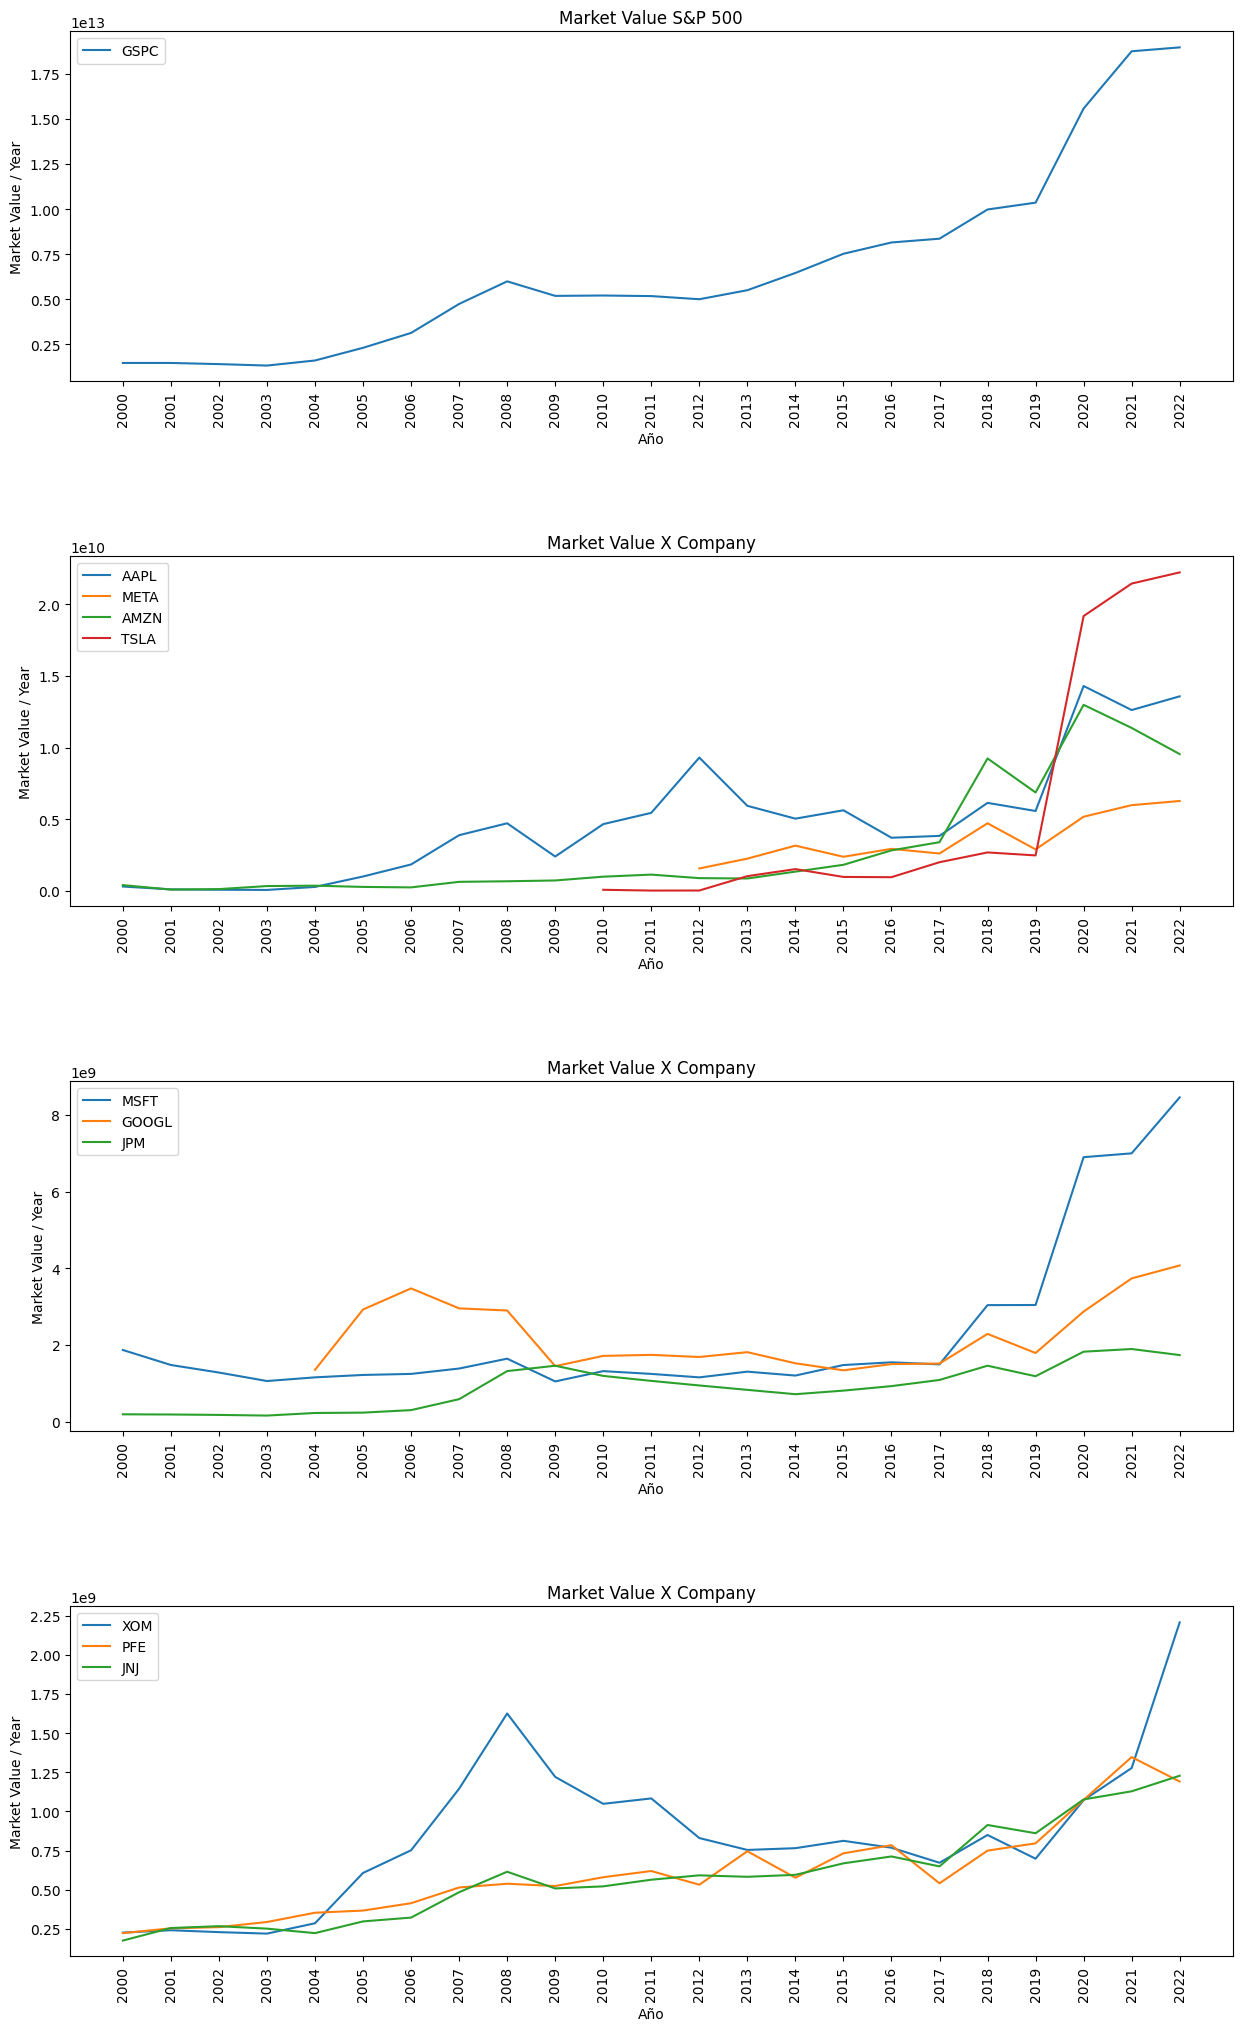

In [272]:
#COMPORTAMIENTO VALOR DE MERCADO ANUAL COMPAÑÍAS TOP 10 vs ÍNDICE S&P 500
fig, axes = plt.subplots(4, figsize=(15, 25))

axes[0].plot(yea_mar_val['Year'], yea_mar_val['GSPC_Mar_Val'], label='GSPC')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Market Value / Year')
axes[0].set_title('Market Value S&P 500')
axes[0].tick_params(axis='x', rotation=90)
axes[0].legend()

axes[1].plot(yea_mar_val['Year'], yea_mar_val['AAPL_Mar_Val'], label='AAPL')
axes[1].plot(yea_mar_val['Year'], yea_mar_val['META_Mar_Val'], label='META')
axes[1].plot(yea_mar_val['Year'], yea_mar_val['AMZN_Mar_Val'], label='AMZN')
axes[1].plot(yea_mar_val['Year'], yea_mar_val['TSLA_Mar_Val'], label='TSLA')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Market Value / Year')
axes[1].set_title('Market Value X Company')
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend()

#axes[0,1].plot(yea_mar_val['Year'], yea_mar_val['GSPC_Mar_Val'], label='GSPC')
axes[2].plot(yea_mar_val['Year'], yea_mar_val['MSFT_Mar_Val'], label='MSFT')
axes[2].plot(yea_mar_val['Year'], yea_mar_val['GOOGL_Mar_Val'], label='GOOGL')
axes[2].plot(yea_mar_val['Year'], yea_mar_val['JPM_Mar_Val'], label='JPM')
axes[2].set_xlabel('Año')
axes[2].set_ylabel('Market Value / Year')
axes[2].set_title('Market Value X Company')
axes[2].tick_params(axis='x', rotation=90)
axes[2].legend()

#axes[1,0].plot(yea_mar_val['Year'], yea_mar_val['GSPC_Mar_Val'], label='GSPC')
axes[3].plot(yea_mar_val['Year'], yea_mar_val['XOM_Mar_Val'], label='XOM')
axes[3].plot(yea_mar_val['Year'], yea_mar_val['PFE_Mar_Val'], label='PFE')
axes[3].plot(yea_mar_val['Year'], yea_mar_val['JNJ_Mar_Val'], label='JNJ')
axes[3].set_xlabel('Año')
axes[3].set_ylabel('Market Value / Year')
axes[3].set_title('Market Value X Company')
axes[3].tick_params(axis='x', rotation=90)
axes[3].legend()

fig.subplots_adjust(hspace=0.5)
plt.show()

Los anteriores gráficos nos muestran el comportamiento de valor de mercado para las compañias top-10 del índice S&P 500 durante los últimos 23 años; éstas visualizaciones nos confirman lo expresado en el análisis general, es importante resaltar en este punto la variedad de sectores que componen el top de empresas con mayor valor de mercado en el índice, ya que encontramos una pluralidad interesante (Tecnologías de la Información, Consumo, Comunicaciones, Salud, Financiero, Industria, Energía), esta multiplicidad hace altamente atractiva la inversión en el mercado de valores.

## Cabe anotar que se han dividido las gráficas para mejor entendimiento y tomando en cuenta que la escala de valoración es diferente para algunas empresas:
*   Gráfica 1:  Índice S&P 500; puede evidenciarse un crecimiento interesante a partir del año 2017, misma temporada en que las compañías top-10 experimentaron eventos importantes -explicados anteriormente- que las pusieron en lugares de privilegio.

*   Gráfica 2:  Apple, Facebook, Amazon, Tesla (Ingreso al listado: Tesla-2010, Facebook-2012). Crecimiento importante para este grupo a partir de 2017, en años anteriores se evidencia una curva muy estable.

*   Gráfica 3:  Microsoft, Google, JPMorgan (Ingreso al listado: Google-2004). A partir de 2017 curva ascendente en su valor de mercado.

*   Gráfica 4:  Exxon, Pfizer, Johnson. La compañía Exxon experimenta una subida interesante hacia 2008, lo anterior debido al alto incremento de los precios del petróleo. Pfizer y Johnson muy estables a través del tiempo y a partir de 2020 crecimiento por situación pandémica (vacunas).

In [310]:
#PRESENCIA EN EL MERCADO DE LAS EMPRESAS TOP 10 A TRAVÉS DE LOS AÑOS
fig, axs = plt.subplots(4, figsize=(15, 25))

axs[0].bar(yea_mar_val['Year'], yea_mar_val['AAPL_Mar_Val'], label='AAPL')
axs[0].bar(yea_mar_val['Year'], yea_mar_val['META_Mar_Val'], label='META')
axs[0].bar(yea_mar_val['Year'], yea_mar_val['AMZN_Mar_Val'], label='AMZN')
axs[0].set_xlabel('Año')
axs[0].set_ylabel('Market Value / Year')
axs[0].set_title('Market Value X Company')
axs[0].tick_params(axis='x', rotation=90)
axs[0].legend(loc='upper center')

axs[1].bar(yea_mar_val['Year'], yea_mar_val['MSFT_Mar_Val'], label='MSFT')
axs[1].bar(yea_mar_val['Year'], yea_mar_val['GOOGL_Mar_Val'], label='GOOGL')
axs[1].bar(yea_mar_val['Year'], yea_mar_val['JPM_Mar_Val'], label='JPM')
axs[1].set_xlabel('Año')
axs[1].set_ylabel('Market Value / Year')
axs[1].set_title('Market Value X Company')
axs[1].tick_params(axis='x', rotation=90)
axs[1].legend(loc='upper center')

axs[2].bar(yea_mar_val['Year'], yea_mar_val['XOM_Mar_Val'], label='XOM')
axs[2].bar(yea_mar_val['Year'], yea_mar_val['PFE_Mar_Val'], label='PFE')
axs[2].bar(yea_mar_val['Year'], yea_mar_val['JNJ_Mar_Val'], label='JNJ')
axs[2].set_xlabel('Año')
axs[2].set_ylabel('Market Value / Year')
axs[2].tick_params(axis='x', rotation=90)
axs[2].legend(loc='upper center')

axs[3].bar(yea_mar_val['Year'], yea_mar_val['TSLA_Mar_Val'], label='TSLA')
axs[3].set_xlabel('Año')
axs[3].set_ylabel('Market Value / Year')
axs[3].tick_params(axis='x', rotation=90)
axs[3].legend(loc='upper center')

fig.subplots_adjust(hspace=0.5)
plt.show()

Los anteriores gráficos en barra combinada nos permiten visualizar la comparación del valor de mercado de las empresas que estando en el top-10 del índice S&P 500 pueden agruparse;
de esta visualización podemos concluir algunos aspectos interesantes:

*   En el primer grupo (Amazon, Apple, Facebook) se puede evidenciar un mayor valor de mercado para Amazon los últimos cinco (5) años. Apple tuvo un dominio importante entre 2006 y 2012, a partir de ese momento se presenta una disminución en éste rubro.

*   En el segundo grupo (Google, JPMorgan, Microsoft) es posible notar una participación muy regular e igualitaria del valor de mercado a través de los 23 años de estudio, sin evidenciarse diferencias superiores.

*   En el tercer grupo (Exxon, Johnson, Pfizer) vemos como Johnson a través de toda la ventana de tiempo se sostiene como empresa líder de su sector y como aportante fundamental del índice S&P 500 (muy por encima de Pfizer que pertenece a su rubro); la compañía Exxon tuvo crecimiento importante entre 2005 y 2008.

*   En el último gráfico se presenta la compañía Tesla, no se incluyó en ninguno de los anteriores ya que su crecimiento exponencial durante los últimos tres (3) años ha sido bastante notorio dificultando la comparación uno a uno con las demás compañías. Sin duda es una organización que viene generando estrategías de negocio muy eficaces.

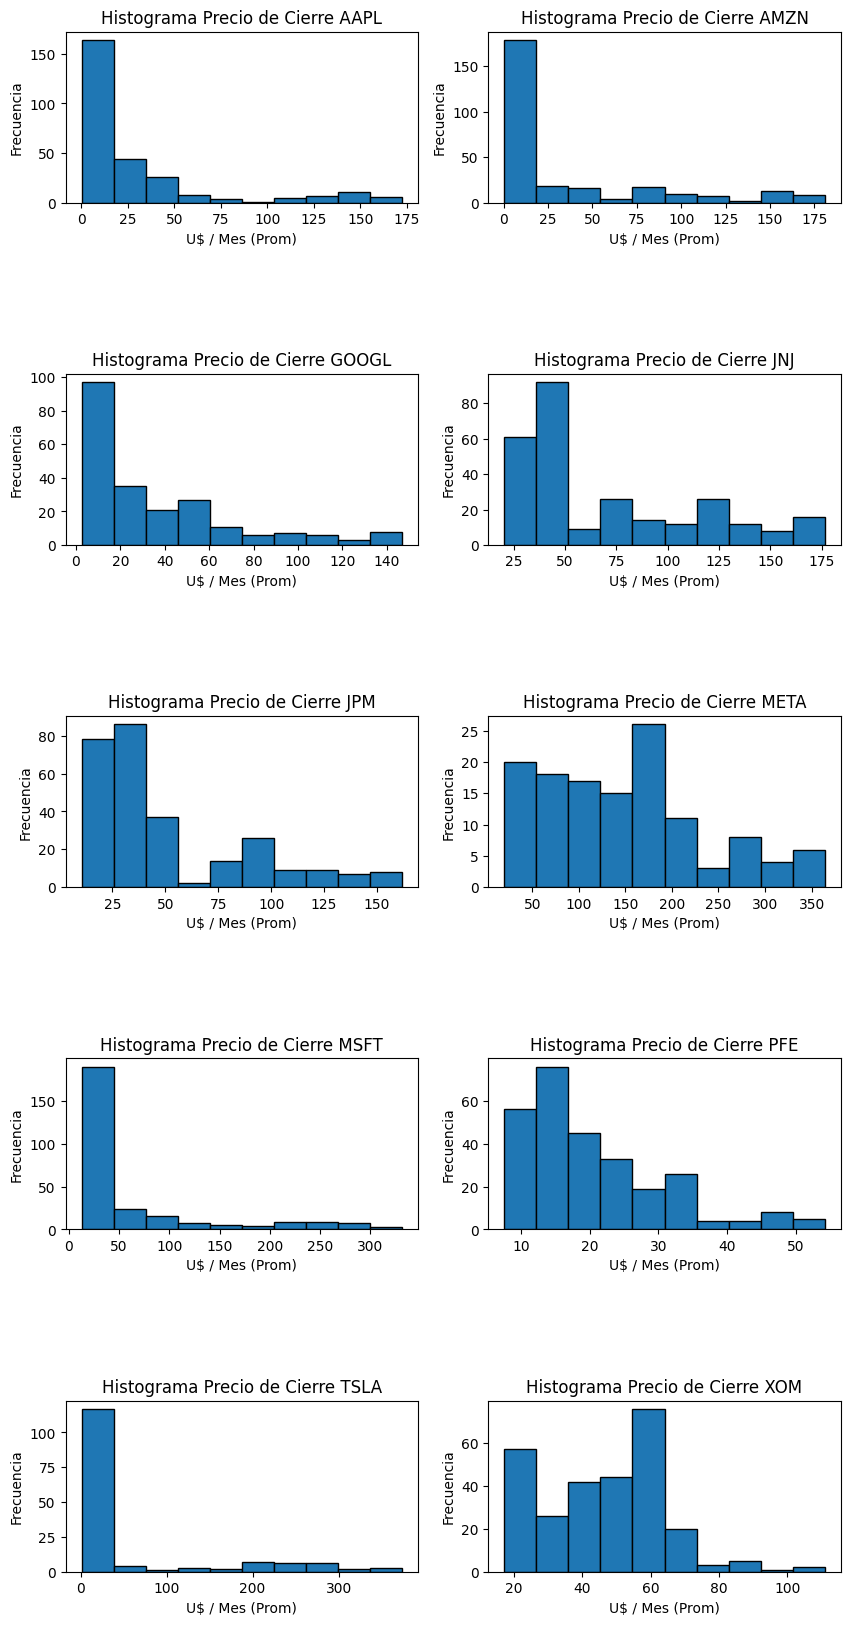

In [53]:
#HISTOGRAMAS PRECIO DE CIERRE MENSUAL COMPAÑÍAS TOP 10
fig, axs = plt.subplots(5, 2, figsize=(10, 20))

axs[0,0].hist(mon_ave_gspc['AAPL_Clo'], bins=10, edgecolor='black')
axs[0,0].set_title('Histograma Precio de Cierre AAPL')
axs[0,0].set_xlabel('U$ / Mes (Prom)')
axs[0,0].set_ylabel('Frecuencia')

axs[0,1].hist(mon_ave_gspc['AMZN_Clo'], bins=10, edgecolor='black')
axs[0,1].set_title('Histograma Precio de Cierre AMZN')
axs[0,1].set_xlabel('U$ / Mes (Prom)')
axs[0,1].set_ylabel('Frecuencia')

axs[1,0].hist(mon_ave_gspc['GOOGL_Clo'], bins=10, edgecolor='black')
axs[1,0].set_title('Histograma Precio de Cierre GOOGL')
axs[1,0].set_xlabel('U$ / Mes (Prom)')
axs[1,0].set_ylabel('Frecuencia')

axs[1,1].hist(mon_ave_gspc['JNJ_Clo'], bins=10, edgecolor='black')
axs[1,1].set_title('Histograma Precio de Cierre JNJ')
axs[1,1].set_xlabel('U$ / Mes (Prom)')
axs[1,1].set_ylabel('Frecuencia')

axs[2,0].hist(mon_ave_gspc['JPM_Clo'], bins=10, edgecolor='black')
axs[2,0].set_title('Histograma Precio de Cierre JPM')
axs[2,0].set_xlabel('U$ / Mes (Prom)')
axs[2,0].set_ylabel('Frecuencia')

axs[2,1].hist(mon_ave_gspc['META_Clo'], bins=10, edgecolor='black')
axs[2,1].set_title('Histograma Precio de Cierre META')
axs[2,1].set_xlabel('U$ / Mes (Prom)')
axs[2,1].set_ylabel('Frecuencia')

axs[3,0].hist(mon_ave_gspc['MSFT_Clo'], bins=10, edgecolor='black')
axs[3,0].set_title('Histograma Precio de Cierre MSFT')
axs[3,0].set_xlabel('U$ / Mes (Prom)')
axs[3,0].set_ylabel('Frecuencia')

axs[3,1].hist(mon_ave_gspc['PFE_Clo'], bins=10, edgecolor='black')
axs[3,1].set_title('Histograma Precio de Cierre PFE')
axs[3,1].set_xlabel('U$ / Mes (Prom)')
axs[3,1].set_ylabel('Frecuencia')

axs[4,0].hist(mon_ave_gspc['TSLA_Clo'], bins=10, edgecolor='black')
axs[4,0].set_title('Histograma Precio de Cierre TSLA')
axs[4,0].set_xlabel('U$ / Mes (Prom)')
axs[4,0].set_ylabel('Frecuencia')

axs[4,1].hist(mon_ave_gspc['XOM_Clo'], bins=10, edgecolor='black')
axs[4,1].set_title('Histograma Precio de Cierre XOM')
axs[4,1].set_xlabel('U$ / Mes (Prom)')
axs[4,1].set_ylabel('Frecuencia')

fig.subplots_adjust(hspace=1)
plt.show()

In [55]:
#HISTOGRAMA PRECIO DE CIERRE MENSUAL S&P 500
plt.hist(mon_ave_gspc['GSPC_Clo'], bins=10, edgecolor='black')
plt.xlabel('U$ / Mes (Prom)')
plt.ylabel('Frecuencia')
plt.title('Histograma Precio de Cierre GSPC')
plt.show()

In [22]:
#SE DEFINE FUNCIÓN PARA REALIZAR SUMATORIA DE LOS CAMPOS PRECIO DE CIERRE Y VOLUMEN DE NEGOCIACIÓN DE LAS COMPAÑÍAS TOP 10, EVITANDO VALORES NULOS
def suma_AB(row):
    return np.nansum([row['AAPL_Clo'], row['AMZN_Clo'], row['GOOGL_Clo'], row['JNJ_Clo'], row['JPM_Clo'], row['META_Clo'], row['MSFT_Clo'], row['PFE_Clo'], row['TSLA_Clo'], row['XOM_Clo']])

suma_AB_col = mon_ave_gspc.apply(suma_AB, axis=1)

mon_ave_gspc.insert(23, 'Mon_Clo_Sum', suma_AB_col)

In [26]:
#SE CALCULA PORCENTAJE DE PARTICIPACIÓN ANUAL DE LAS EMPRESAS TOP 10 EN EL ÍNDICE S&P 500
porc = mon_ave_gspc['Mon_Clo_Sum'] / mon_ave_gspc['GSPC_Clo']
mon_ave_gspc.insert(loc=24, column='Mon_Clo_Por', value=porc)

In [28]:
#SE EXPORTA A FORMATO csv LA INFORMACIÓN OBTENIDA ANTERIORMENTE
mon_ave_gspc.to_csv('mon_ave_gspc.csv', sep=';', index=False)

In [ ]:
#CÁLCULO PORCENTAJE (%) DE PARTICIPACIÓN MENSUAL PROMEDIO EMPRESAS TOP 10 FRENTE A ÍNDICE S&P 500
xom = mon_ave_gspc['XOM_Clo'].sum()
gspc = mon_ave_gspc['GSPC_Clo'].sum()
rate = xom / gspc
rate

## Los anteriores histogramas de Precio de Cierre Mensual (promedio) nos permiten concluir:
* Porcentaje de participación mensual promedio de la compañía Apple al índice S&P 500 = 1.5%

* Porcentaje de participación mensual promedio de la compañía Amazon al índice S&P 500 = 1.8%

* Porcentaje de participación mensual promedio de la compañía Google al índice S&P 500 = 1.6%

* Porcentaje de participación mensual promedio de la compañía Johnson al índice S&P 500 = 3.8%

* Porcentaje de participación mensual promedio de la compañía JPMorgan al índice S&P 500 = 2.7%

* Porcentaje de participación mensual promedio de la compañía Facebook al índice S&P 500 = 3.6%

* Porcentaje de participación mensual promedio de la compañía Microsoft al índice S&P 500 = 3.3%

* Porcentaje de participación mensual promedio de la compañía Pfizer al índice S&P 500 = 1.1%

* Porcentaje de participación mensual promedio de la compañía Tesla al índice S&P 500 = 1.7%

* Porcentaje de participación mensual promedio de la compañía Exxon al índice S&P 500 = 2.5%

## Tratamiento de Outliers

Éste tratamiento se realizará por mes y tomando como premisa el valor de mercado de cada compañía en el top 10, lo anterior debido a que las políticas monetarias, así como la inflación anual y demás variables macroeconómicas de los países (Estados Unidos para nuestro estudio), varían sustancialmente de un año a otro, por lo que un análisis centrado en valores diarios generaría mucho "ruido" o desviación con valores atípicos que estarían íntimamente relacionados a los sucesos que se presentan a nivel global.

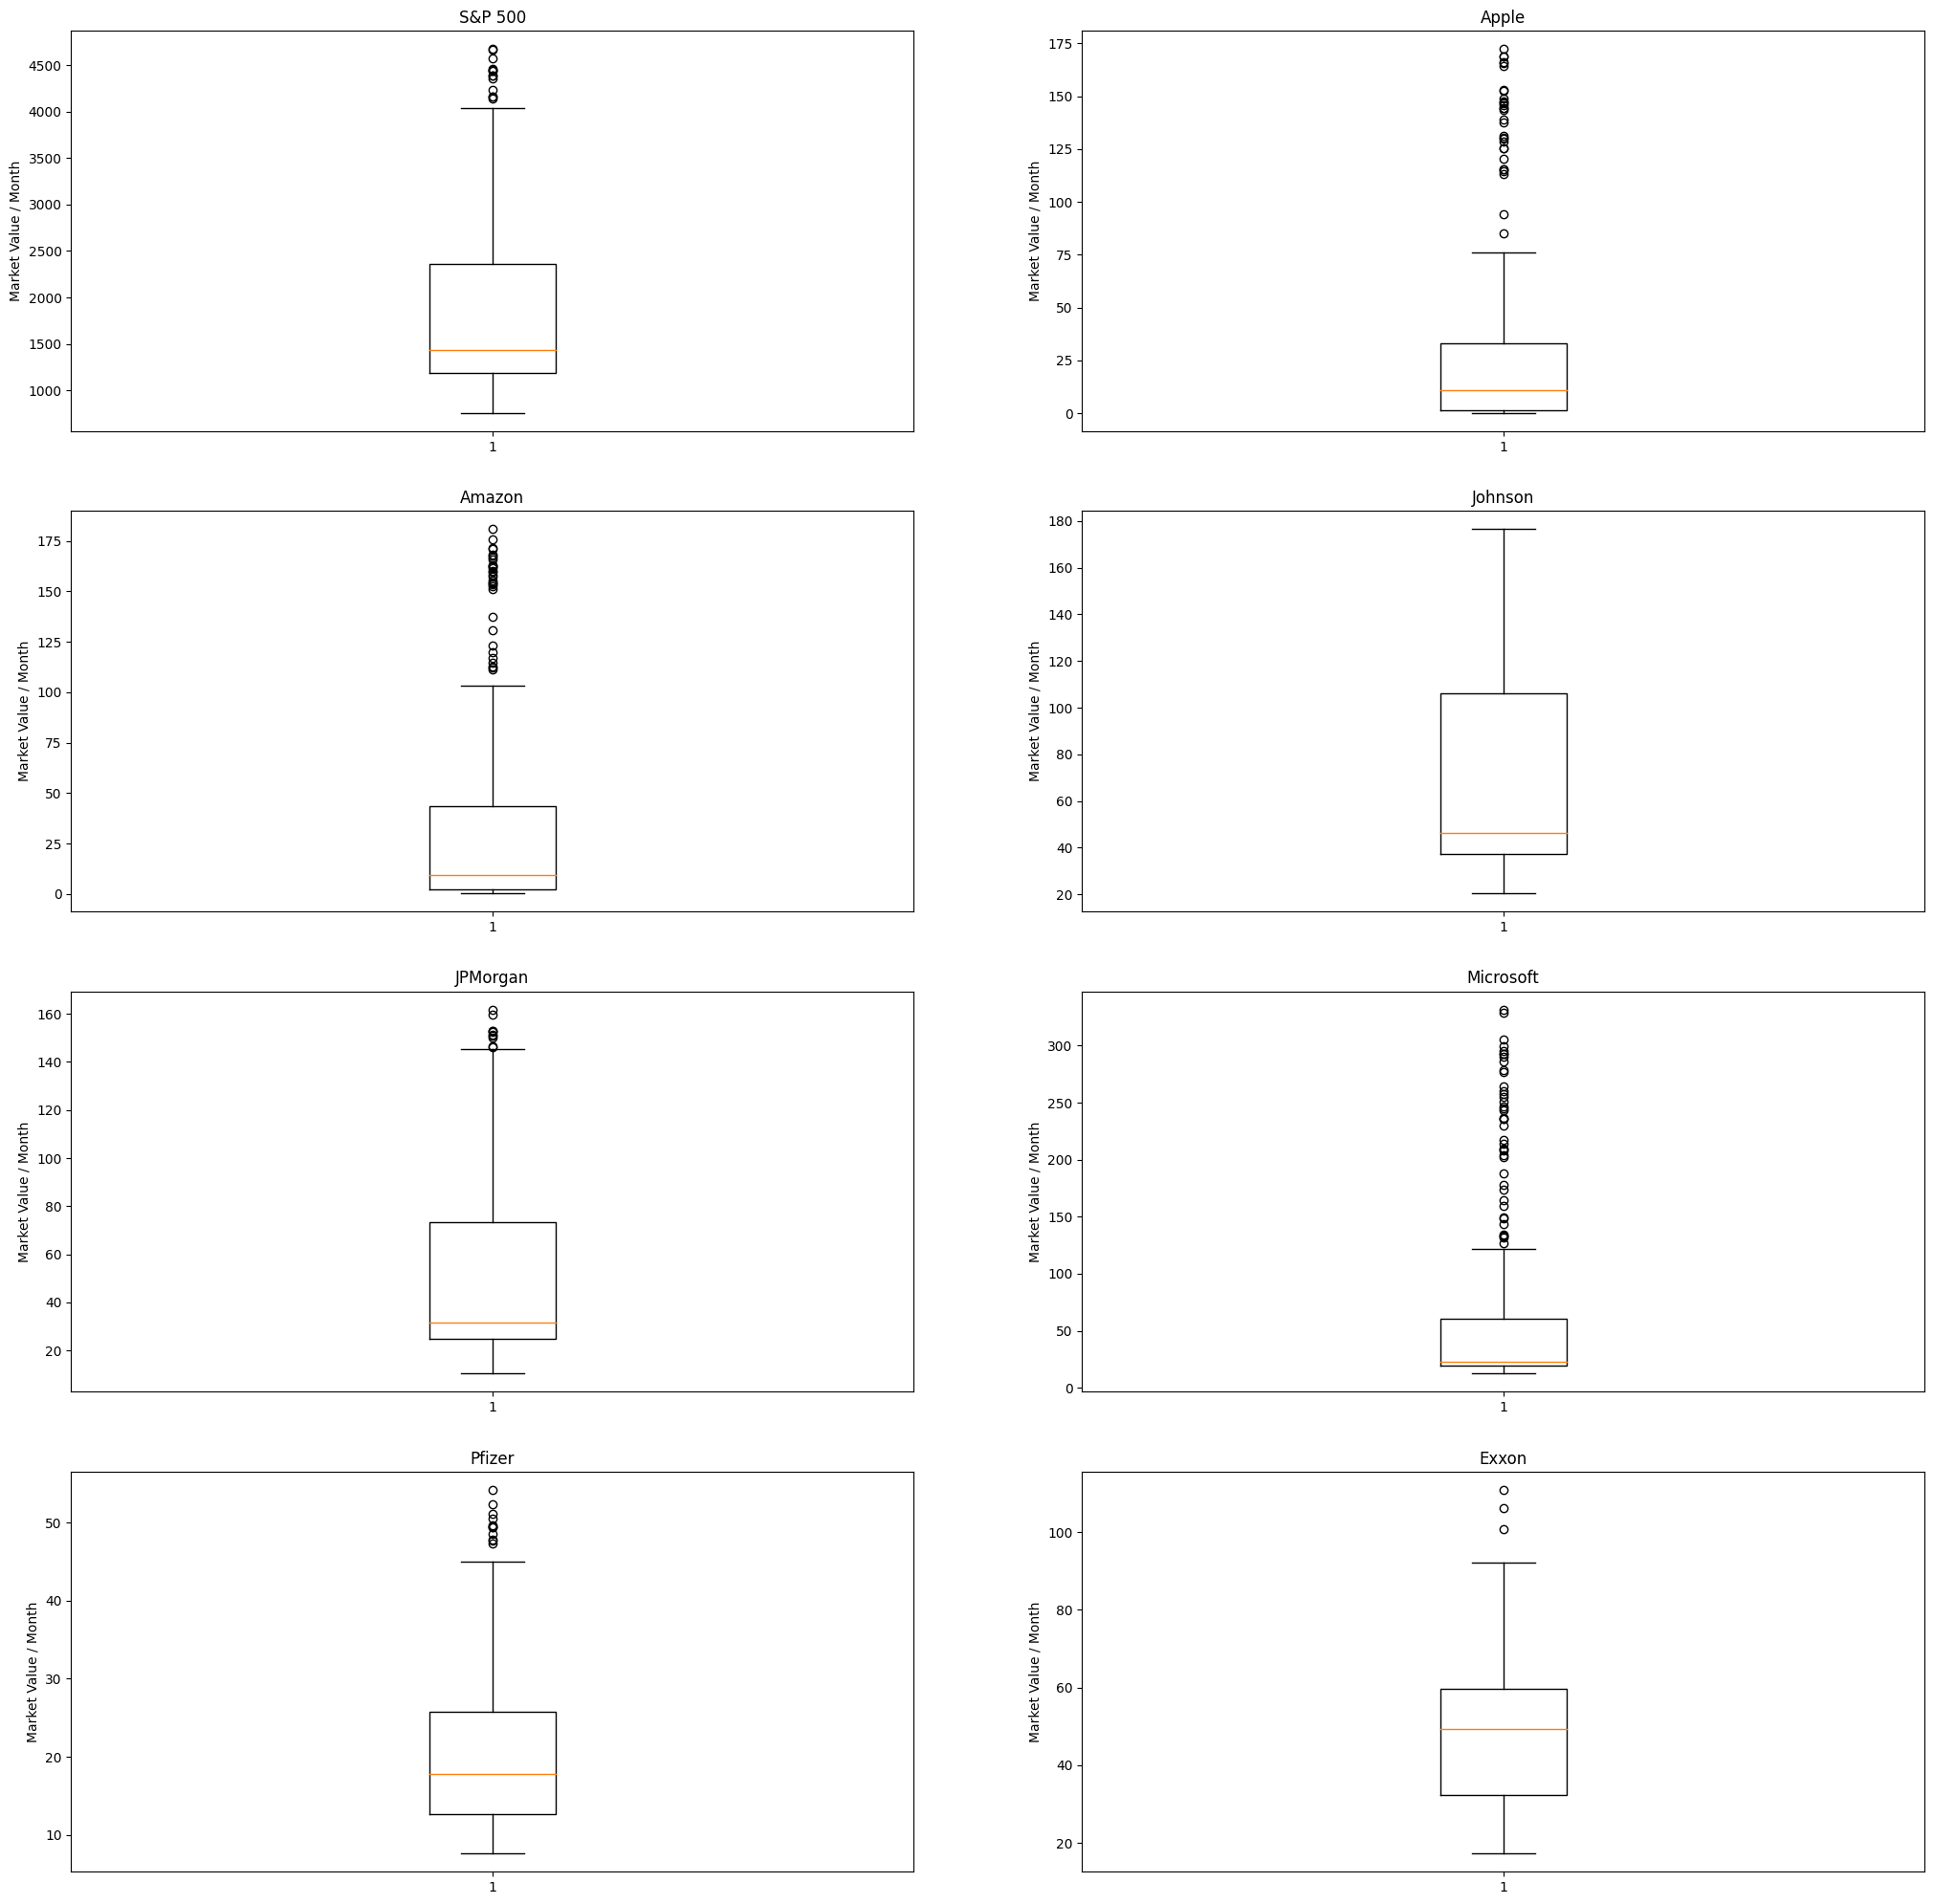

In [113]:
#DIÁGRAMA DE CAJAS PARA VISUALIZACIÓN DE OULIERS
fig, axs = plt.subplots(4,2, figsize=(25, 25))

axs[0,0].boxplot(mon_ave_gspc['GSPC_Clo'])
axs[0,0].set_ylabel('Market Value / Month')
axs[0,0].set_title('S&P 500')

axs[0,1].boxplot(mon_ave_gspc['AAPL_Clo'])
axs[0,1].set_ylabel('Market Value / Month')
axs[0,1].set_title('Apple')

axs[1,0].boxplot(mon_ave_gspc['AMZN_Clo'])
axs[1,0].set_ylabel('Market Value / Month')
axs[1,0].set_title('Amazon')

axs[1,1].boxplot(mon_ave_gspc['JNJ_Clo'])
axs[1,1].set_ylabel('Market Value / Month')
axs[1,1].set_title('Johnson')

axs[2,0].boxplot(mon_ave_gspc['JPM_Clo'])
axs[2,0].set_ylabel('Market Value / Month')
axs[2,0].set_title('JPMorgan')

axs[2,1].boxplot(mon_ave_gspc['MSFT_Clo'])
axs[2,1].set_ylabel('Market Value / Month')
axs[2,1].set_title('Microsoft')

axs[3,0].boxplot(mon_ave_gspc['PFE_Clo'])
axs[3,0].set_ylabel('Market Value / Month')
axs[3,0].set_title('Pfizer')

axs[3,1].boxplot(mon_ave_gspc['XOM_Clo'])
axs[3,1].set_ylabel('Market Value / Month')
axs[3,1].set_title('Exxon')

#fig.subplots_adjust(hspace=0.5)
plt.show()

In [87]:
#SE CONVIERTE LA COLUMNA (Month)  A TIPO DATETIME
mon_mar_val['Month'] = pd.to_datetime(mon_mar_val['Month'])

In [83]:
#SE LLEVA A CABO LA DETECCIÓN DE OUTLIERS (EN ESTA MISMA LÍNEA SE REALIZA EL ANÁLISIS PARA CADA COMPAÑÍA Y POR ÚLTIMO, PARA EL ÍNDICE S&P 500)
fecha_inicio = '2022-01'
fecha_fin = '2022-12'
df_fechas = mon_mar_val.loc[(mon_mar_val['Month'] >= fecha_inicio) & (mon_mar_val['Month'] <= fecha_fin)]

#SE CALCULA EL RANGO INTERCUARTÍLICO PARA CADA COMPAÑIA TOP 10 Y PARA EL ÍNDICE S&P 500
Q1 = df_fechas['GSPC_Mar_Val'].quantile(0.25)
Q3 = df_fechas['GSPC_Mar_Val'].quantile(0.75)
IQR = Q3 - Q1

#sE DEFINE EL RANGO DE OUTLIERS
outlier_range = (Q1 - 1.5*IQR, Q3 + 1.5*IQR)

#SE FILTRAN LOS VALORES QUE SE ENCUENTRAN POR FUERA DEL RANGO
outliers = df_fechas[(df_fechas['GSPC_Mar_Val'] < outlier_range[0]) | (df_fechas['GSPC_Mar_Val'] > outlier_range[1])]

print(outliers)

Empty DataFrame
Columns: [Month, GSPC_Mar_Val, AAPL_Mar_Val, AMZN_Mar_Val, GOOGL_Mar_Val, JNJ_Mar_Val, JPM_Mar_Val, META_Mar_Val, MSFT_Mar_Val, PFE_Mar_Val, TSLA_Mar_Val, XOM_Mar_Val, Mar_Val_Sum, Mar_Val_Por]
Index: []


## Del anterior análisis es posible concluir:
#### El mercado búrsatil es altamente regulado, por lo que cualquier valor atípico se corresponde con eventos de orden global (guerras, enfermedades, tensión en las relaciones políticas, ingreso al mercado de nuevos competidores, etc.); indicando esto que no necesariamente se consideran anomalías sino respuestas del mercado a movimientos de nivel mundial.

*   Año 2000:   Muchas empresas de tecnología sufrieron una caída dramática en los precios de sus acciones, lo que tuvo un impacto en el mercado de valores en su conjunto. Del mismo modo, las empresas estadounidenses se vieron afectadas por la reducción en la demanda de bienes y servicios (desaceleración económica).

*   Año 2001:   Los ataques del 9/11 provocaron el cierre de los mercados financieros, afectando la confianza de los inversionistas, lo que llevó a desaceleración económica.

*   Año 2002:   Escándalos como el de la empresa Enron (falta de transparencia en sus estados financieros) afectaron negativamente las bolsas de valores a nivel global; capítulo importante tuvieron igualmente los rumores de guerra USA-Irak.

*   Año 2003:   La invasión de USA a Irak tuvo alto impacto en los precios del petróleo. Caída en el valor del dolar.

*   Año 2004:   La victoria del presidente electo fue vista positivamente por los mercados; aumentod de las tasas de interés.

*   Año 2005:   Huracán Katrina genera aumento en los precios del petróleo y disminución de la producción afectó a las empresas energéticas.

*   Año 2006:   Crisis del mercado inmobiliarioe en los Estados Unidos; desaceleración económica China afecta todos los mercados mundiales.

*   Año 2007:   Caída en el precio de las materias primas, especialmente el petróleo; colapso del mercado de la vivienda en USA.

*   Año 2008:   Quiebra del banco de inversión estadounidense Lehman Brothers; recesión económica mundial afecta mercados financieros de todo el orbe.

*   Año 2009:   Crisis crediticia: bancos e instituciones financieras otorgan grandes préstamos a personas de dudoso comportamiento crediticio, los bancos sufrieron grandes pérdidas afectando la confianza en el sistema financiero.

*   Año 2010:   Crisis fiscal en Estados Unidos provoca caída en el precio de las acciones; desaceleración económica China.

*   Año 2011:   Crisis política en Oriente Medio y Norte de África provoca volatilidad en los precios del petróleo y en los mercados financieros globales.

*   Año 2012:   Elecciones presidenciales en USA, siempre se espera que las nuevas política económicas de los presidentes electos tengan impacto significativo en los mercados financieros.

*   Año 2013:   La Reserva Federal de los Estados Unidos anuncia el retiro gradual del programa de estímulo económico, lo que llevó a una alta volatilidad en los mercados financieros del mundo.

*   Año 2014:   Fin de la política de estímulo económico lo que provocó aumento de las tasas de interes y volatilidad en los mercados financieros. Tensión entre Rusia y Ucrania.

*   Año 2015:   Aumento de las tasas de interés por primera vez desde la crisis de 2008 genera incertidumbre; caída en los precios de las materias primas.

*   Año 2016:   Referéndum del Reino Unido sobre la Unión Europea (Brexit); Elecciones presidenciales en USA.

*   Año 2017:   Reserva Federal de USA aumenta las tasas de interés; la administración Trump presenta la reforma tributaria y otras medidas protecionistas, generando incertidumbre y alta volatilidad en los mercados financieros.

*   Año 2018:   Guerra comercial entre China y Estados Unidos; incertidumbre sobre el Brexit, desaceleración económica mundial.

*   Año 2019:   Recortes de producción de la OPEP y otros productores de petróleo afectaron positivamente a los países productores y negativamente a los importadores.

*   Año 2020:   La Pandemia del COVID-19 tuvo gran impacto en las bolsas de valores. En marzo, el índice S&P 500 sufrió su peor caída desde 1987; elecciones presidenciales en USA.

*   Año 2021:   La continuación de la pandemia del COVID-19 continua afectando la economía global debido a la aparición de nuevas variantes; inflación y ajustes de políticas monetarias en muchos países para frenar el aumento de precios.

*   Año 2022:   Invasión a Ucrania por parte del ejército Ruso; tensiones geopolíticas también afectan los mercados de valores.

En términos del presente análisis los valores considerados atípicos no hacen referencia necesariamente a errores en los datos o no reales, el mercado de valores (búrsatil o accionario) es de alta volatilidad, cualquier suceso del orden político, natural, pandémico, etc. genera alta inestabilidad en los mercados con su consecuente variación en los precios de las acciones negociadas, pero en términos generales al ser mercados regulados el precio se considera estable en ventanas superiores de tiempo (el valor de una acción puede estar bajando en una ventana temporal semanal y permanecer estable o ganando en una ventana temporal mensual); dicho lo anterior las decisiones de inversión deberán tomarse de acuerdo al tipo de inversor (corto, mediano o largo plazo) que una persona o compañía sean.

No se hizo tratamiento especial a los valores atípicos en este ejercicio, solamente se identifican y se sustentan, toda vez que los mismos hacen parte inherente de la naturaleza propia de los mercados de valores.

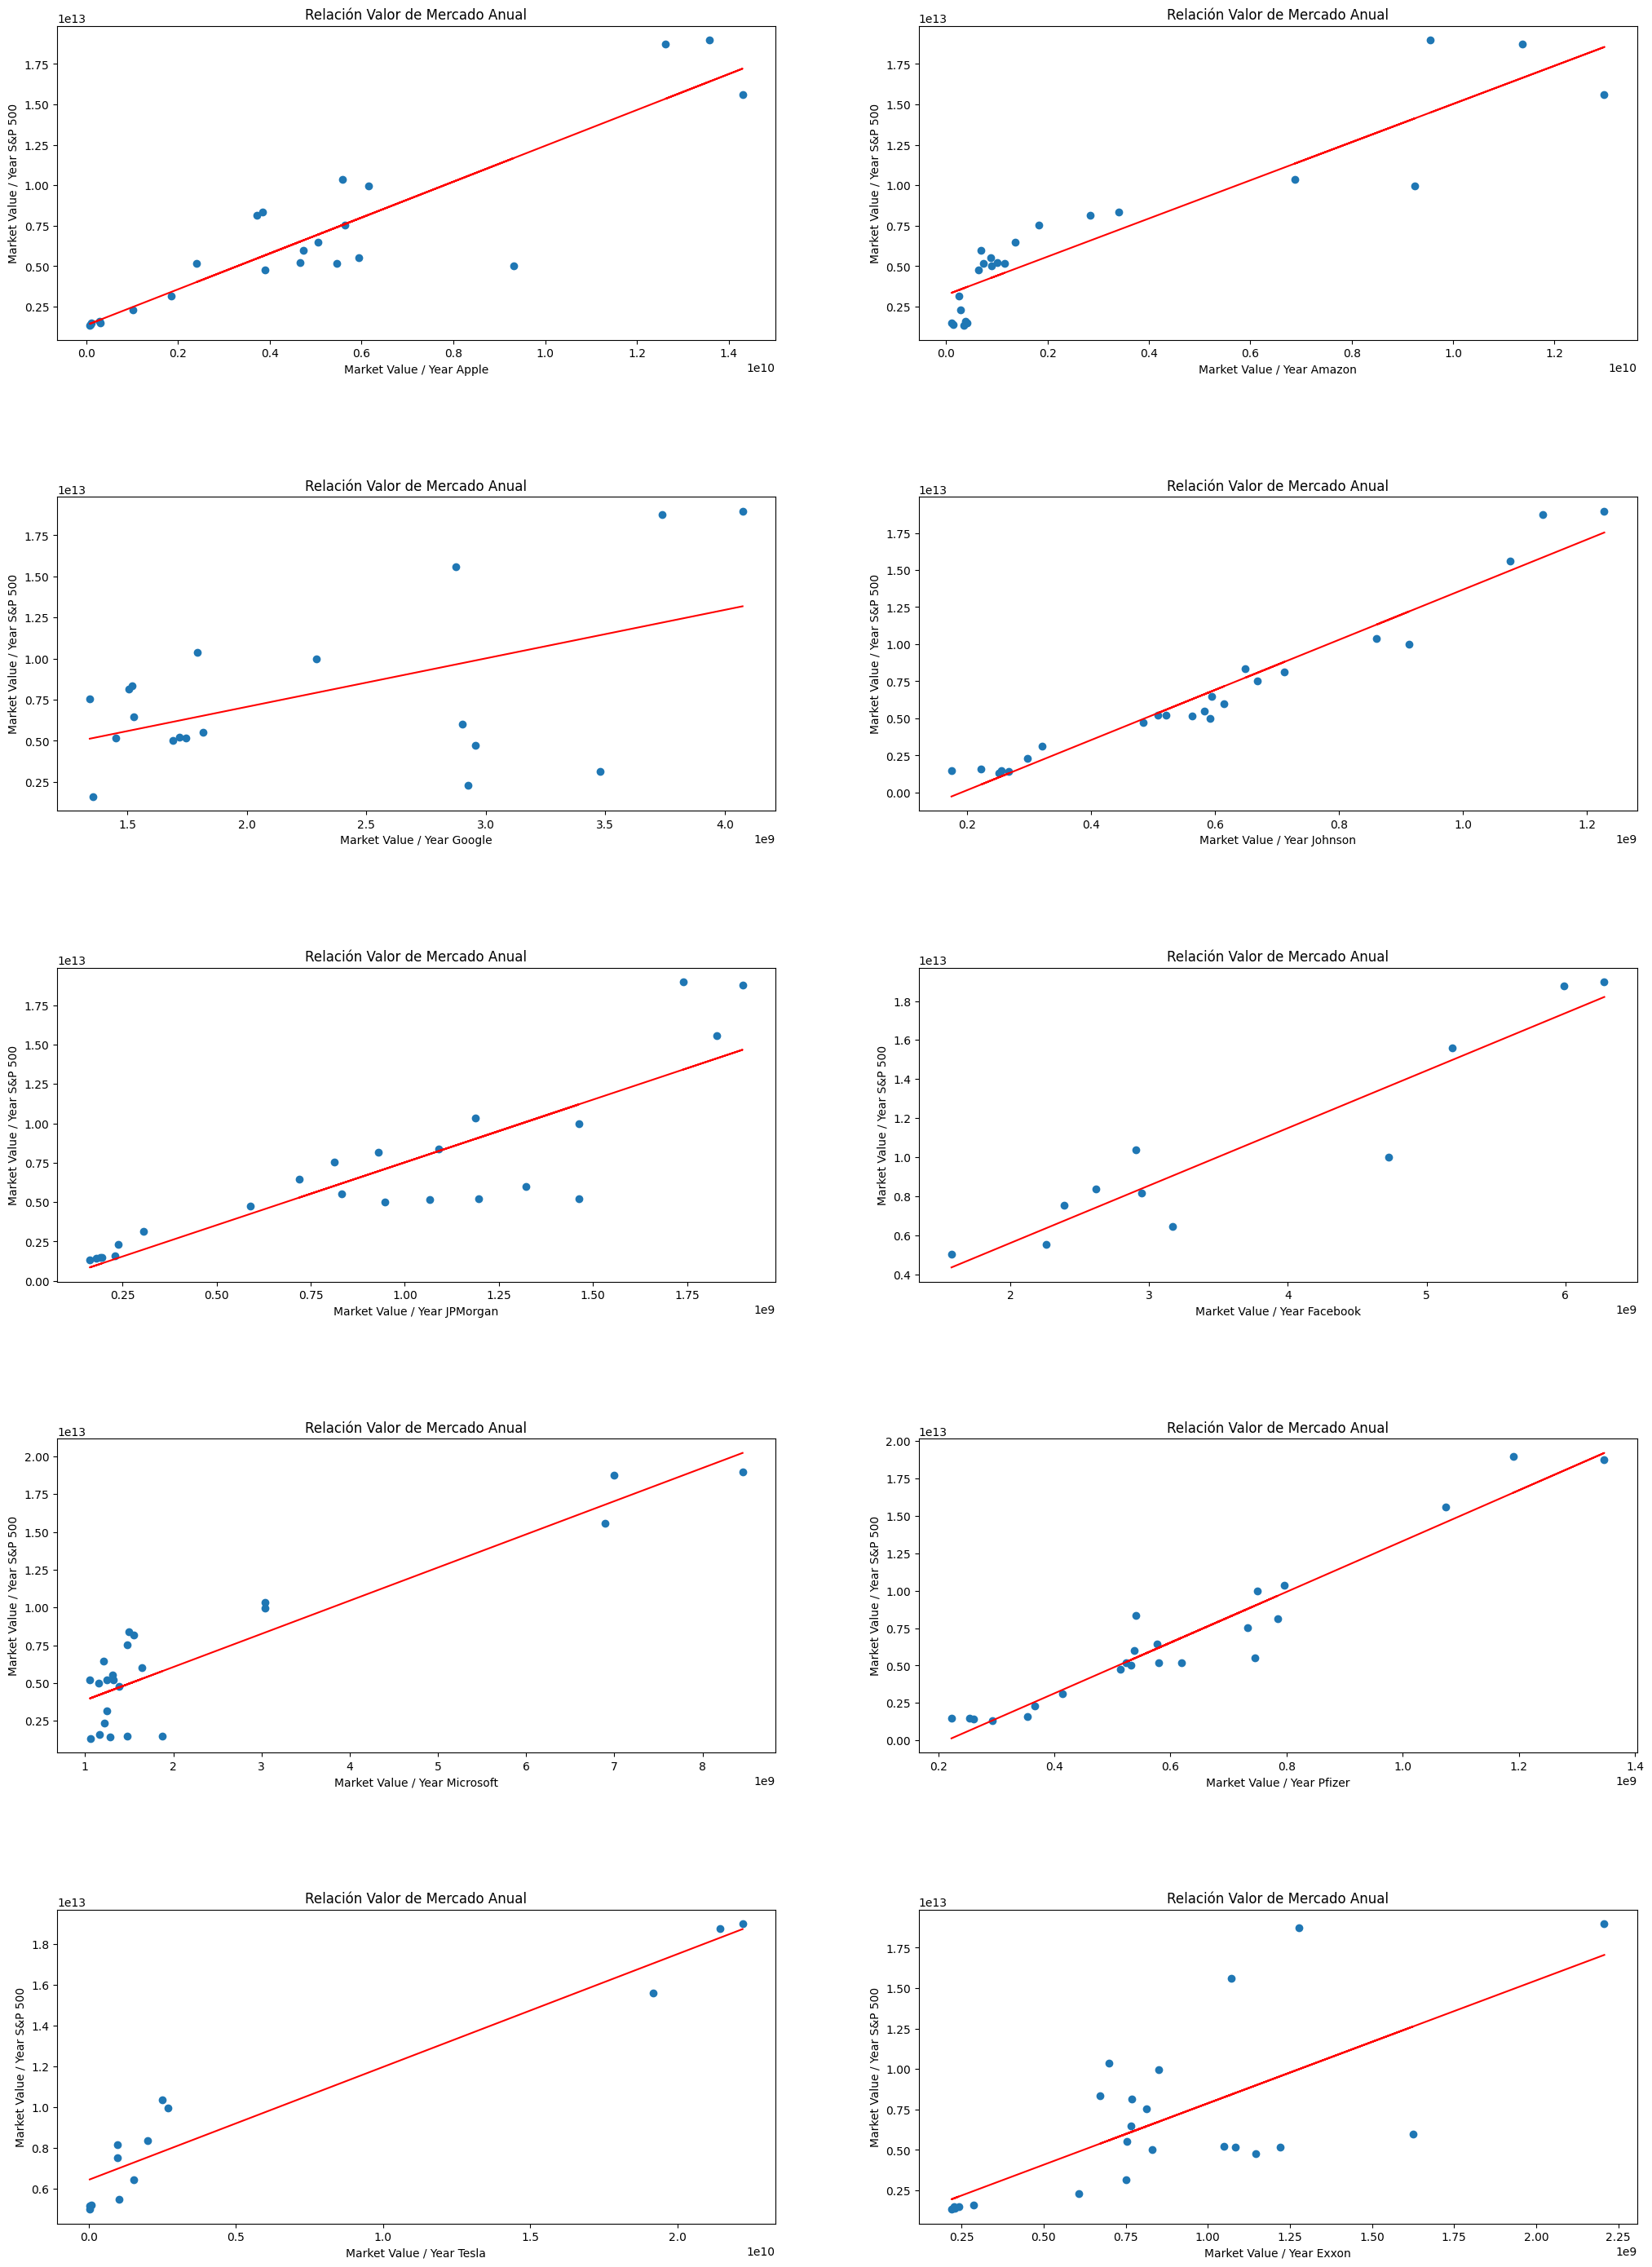

In [170]:
#DIÁGRAMAS DE DISPERSIÓN RELACIÓN ENTRE VARIABLES
fig, axs = plt.subplots(5,2, figsize=(25, 35))

m, b = np.polyfit(yea_mar_val['AAPL_Mar_Val'], yea_mar_val['GSPC_Mar_Val'], 1)
axs[0,0].scatter(yea_mar_val['AAPL_Mar_Val'], yea_mar_val['GSPC_Mar_Val'])
axs[0,0].plot(yea_mar_val['AAPL_Mar_Val'], ((m * yea_mar_val['AAPL_Mar_Val']) + b), color='red')
axs[0,0].set_title('Relación Valor de Mercado Anual')
axs[0,0].set_xlabel('Market Value / Year Apple')
axs[0,0].set_ylabel('Market Value / Year S&P 500')

a, c = np.polyfit(yea_mar_val['AMZN_Mar_Val'], yea_mar_val['GSPC_Mar_Val'], 1)
axs[0,1].scatter(yea_mar_val['AMZN_Mar_Val'], yea_mar_val['GSPC_Mar_Val'])
axs[0,1].plot(yea_mar_val['AMZN_Mar_Val'], ((a * yea_mar_val['AMZN_Mar_Val']) + c), color='red')
axs[0,1].set_title('Relación Valor de Mercado Anual')
axs[0,1].set_xlabel('Market Value / Year Amazon')
axs[0,1].set_ylabel('Market Value / Year S&P 500')

x = yea_mar_val['GOOGL_Mar_Val']
y = yea_mar_val['GSPC_Mar_Val']
mask = ~np.isnan(x) & ~np.isnan(y)
x = x[mask]
y = y[mask]
coeffs = np.polyfit(x, y, 1)
#d, e = np.polyfit(yea_mar_val['GOOGL_Mar_Val'], yea_mar_val['GSPC_Mar_Val'], 1)
axs[1,0].scatter(x, y)
xfit = np.linspace(x.min(), x.max(), 2)
yfit = np.polyval(coeffs, xfit)
axs[1,0].plot(xfit, yfit, color='red')
#axs[1,0].plot(yea_mar_val['GOOGL_Mar_Val'], ((d * yea_mar_val['GOOGL_Mar_Val']) + e), color='red')
axs[1,0].set_title('Relación Valor de Mercado Anual')
axs[1,0].set_xlabel('Market Value / Year Google')
axs[1,0].set_ylabel('Market Value / Year S&P 500')

f, g = np.polyfit(yea_mar_val['JNJ_Mar_Val'], yea_mar_val['GSPC_Mar_Val'], 1)
axs[1,1].scatter(yea_mar_val['JNJ_Mar_Val'], yea_mar_val['GSPC_Mar_Val'])
axs[1,1].plot(yea_mar_val['JNJ_Mar_Val'], ((f * yea_mar_val['JNJ_Mar_Val']) + g), color='red')
axs[1,1].set_title('Relación Valor de Mercado Anual')
axs[1,1].set_xlabel('Market Value / Year Johnson')
axs[1,1].set_ylabel('Market Value / Year S&P 500')

h, i = np.polyfit(yea_mar_val['JPM_Mar_Val'], yea_mar_val['GSPC_Mar_Val'], 1)
axs[2,0].scatter(yea_mar_val['JPM_Mar_Val'], yea_mar_val['GSPC_Mar_Val'])
axs[2,0].plot(yea_mar_val['JPM_Mar_Val'], ((h * yea_mar_val['JPM_Mar_Val']) + i), color='red')
axs[2,0].set_title('Relación Valor de Mercado Anual')
axs[2,0].set_xlabel('Market Value / Year JPMorgan')
axs[2,0].set_ylabel('Market Value / Year S&P 500')

w = yea_mar_val['META_Mar_Val']
z = yea_mar_val['GSPC_Mar_Val']
mask = ~np.isnan(w) & ~np.isnan(z)
w = w[mask]
z = z[mask]
coefs = np.polyfit(w, z, 1)
#j, k = np.polyfit(yea_mar_val['META_Mar_Val'], yea_mar_val['GSPC_Mar_Val'], 1)
axs[2,1].scatter(w, z)
wfit = np.linspace(w.min(), w.max(), 2)
zfit = np.polyval(coefs, wfit)
axs[2,1].plot(wfit, zfit, color='red')
#axs[2,1].plot(yea_mar_val['META_Mar_Val'], ((j * yea_mar_val['META_Mar_Val']) + k), color='red')
axs[2,1].set_title('Relación Valor de Mercado Anual')
axs[2,1].set_xlabel('Market Value / Year Facebook')
axs[2,1].set_ylabel('Market Value / Year S&P 500')

l, n = np.polyfit(yea_mar_val['MSFT_Mar_Val'], yea_mar_val['GSPC_Mar_Val'], 1)
axs[3,0].scatter(yea_mar_val['MSFT_Mar_Val'], yea_mar_val['GSPC_Mar_Val'])
axs[3,0].plot(yea_mar_val['MSFT_Mar_Val'], ((l * yea_mar_val['MSFT_Mar_Val']) + n), color='red')
axs[3,0].set_title('Relación Valor de Mercado Anual')
axs[3,0].set_xlabel('Market Value / Year Microsoft')
axs[3,0].set_ylabel('Market Value / Year S&P 500')

o, p = np.polyfit(yea_mar_val['PFE_Mar_Val'], yea_mar_val['GSPC_Mar_Val'], 1)
axs[3,1].scatter(yea_mar_val['PFE_Mar_Val'], yea_mar_val['GSPC_Mar_Val'])
axs[3,1].plot(yea_mar_val['PFE_Mar_Val'], ((o * yea_mar_val['PFE_Mar_Val']) + p), color='red')
axs[3,1].set_title('Relación Valor de Mercado Anual')
axs[3,1].set_xlabel('Market Value / Year Pfizer')
axs[3,1].set_ylabel('Market Value / Year S&P 500')

q = yea_mar_val['TSLA_Mar_Val']
v = yea_mar_val['GSPC_Mar_Val']
mask = ~np.isnan(q) & ~np.isnan(v)
q = q[mask]
v = v[mask]
coef = np.polyfit(q, v, 1)
#r, s = np.polyfit(yea_mar_val['TSLA_Mar_Val'], yea_mar_val['GSPC_Mar_Val'], 1)
axs[4,0].scatter(q, v)
qfit = np.linspace(q.min(), q.max(), 2)
vfit = np.polyval(coef, qfit)
axs[4, 0].plot(qfit, vfit, color='red')
#axs[4,0].plot(yea_mar_val['TSLA_Mar_Val'], ((r * yea_mar_val['TSLA_Mar_Val']) + s), color='red')
axs[4,0].set_title('Relación Valor de Mercado Anual')
axs[4,0].set_xlabel('Market Value / Year Tesla')
axs[4,0].set_ylabel('Market Value / Year S&P 500')

t, u = np.polyfit(yea_mar_val['XOM_Mar_Val'], yea_mar_val['GSPC_Mar_Val'], 1)
axs[4,1].scatter(yea_mar_val['XOM_Mar_Val'], yea_mar_val['GSPC_Mar_Val'])
axs[4,1].plot(yea_mar_val['XOM_Mar_Val'], ((t * yea_mar_val['XOM_Mar_Val']) + u), color='red')
axs[4,1].set_title('Relación Valor de Mercado Anual')
axs[4,1].set_xlabel('Market Value / Year Exxon')
axs[4,1].set_ylabel('Market Value / Year S&P 500')

fig.subplots_adjust(hspace=0.5)
plt.show()

#### Por último, se presentan gráficos de dispersión de las variables valor de mercado para todas las compañías pertenecientes al top 10 histórico en el índice S&P 500 comparando con éste último; como es posible evidenciar, la relación entre los valores que toma a través del tiempo para cada una de las compañías en cuestión, es directa con los valores del índice principal.